# Análisis descriptivo de base de datos

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline

df = pd.read_csv('automobile.csv')
df.head()

,Simbolo_riesgo,Fabricante,tipo_combustible,Aspiración,Num_Puertas,Estilo_chasis,Tracción,Lugar_motor,Base_Llanta,longitud,...,tipo_motor,Num_Cilindros,tamano_Motor,Sistema_Combustible,tasa_Comrpesion,Caballos_poder,Limite_RPM,mpg_ciudad,mpg_viaje,precio
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,9.0,111,5000,21,27,13495
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,dohc,four,130,mpfi,9.0,111,5000,21,27,16500
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,ohcv,six,152,mpfi,9.0,154,5000,19,26,16500
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,ohc,four,109,mpfi,10.0,102,5500,24,30,13950
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,ohc,five,136,mpfi,8.0,115,5500,18,22,17450


# Markdown here

In [4]:
df.describe()

,Simbolo_riesgo,Base_Llanta,longitud,ancho,peso,tamano_Motor,tasa_Comrpesion,Caballos_poder,Limite_RPM,mpg_ciudad,mpg_viaje
count,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000,197.000000
mean,0.837563,98.901015,174.393909,65.950761,53.769543,127.715736,10.131066,104.822335,5121.319797,25.000000,30.502538
std,1.259256,6.064938,12.144498,2.127004,2.456725,41.993323,3.937853,39.660085,483.136314,6.271087,6.648327
min,-2.000000,86.600000,144.600000,61.800000,47.800000,70.000000,7.000000,52.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.500000,166.800000,64.200000,52.000000,98.000000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,120.000000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,102.400000,183.500000,66.900000,55.600000,146.000000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,326.000000,23.000000,288.000000,6600.000000,49.000000,54.000000


# Número de carros por marca

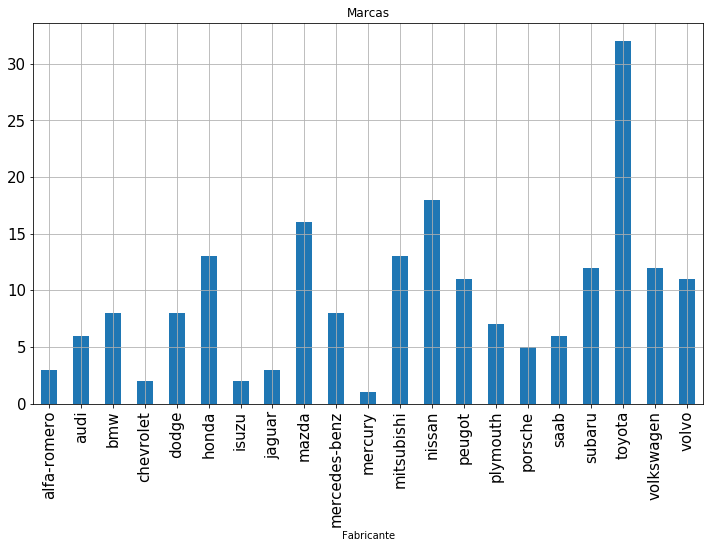

In [5]:
marcas = df.groupby('Fabricante').size()
marcas.plot.bar(figsize=(12,7), title='Marcas', fontsize=15, grid=True, Label='Marcas')

Se puede observar que la mayor cantidad de carros que se tienen registrados son de Toyota, Nissan y Mazda. Los menos registrados son Mercury, Isuzu y Chevrolet

In [6]:
df['Fabricante'].value_counts()

toyota           32
nissan           18
mazda            16
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             8
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           5
alfa-romero       3
jaguar            3
chevrolet         2
isuzu             2
mercury           1
Name: Fabricante, dtype: int64

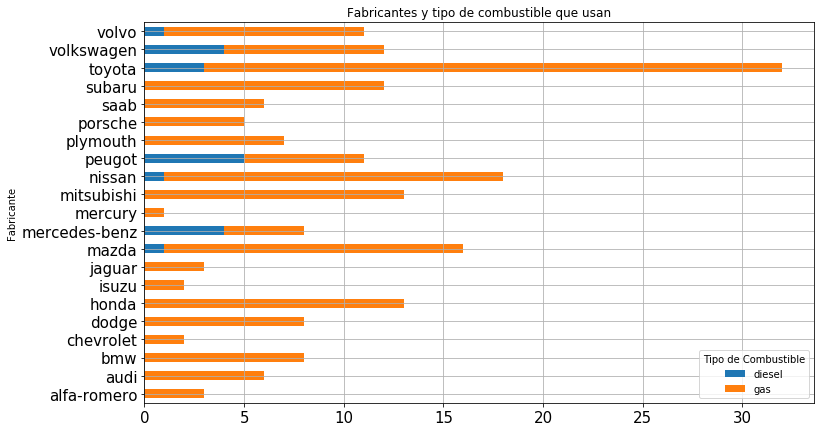

In [7]:
marcas_fuel = pd.crosstab(df.Fabricante, df.tipo_combustible)
marcas_fuel.plot.barh(figsize=(12,7), title='Fabricantes y tipo de combustible que usan', fontsize=15, grid=True, stacked=True)
xlabel : str

plt.show()

En la gran mayoria de las compañias se utiliza gas como fuente de combustible princiapl, con la excepcion de unas cuantas marcas. Las marcas que utilizan diesel en algunos de sus modelos son Peugot, Volkswagen, Mercedes-benz y Toyota

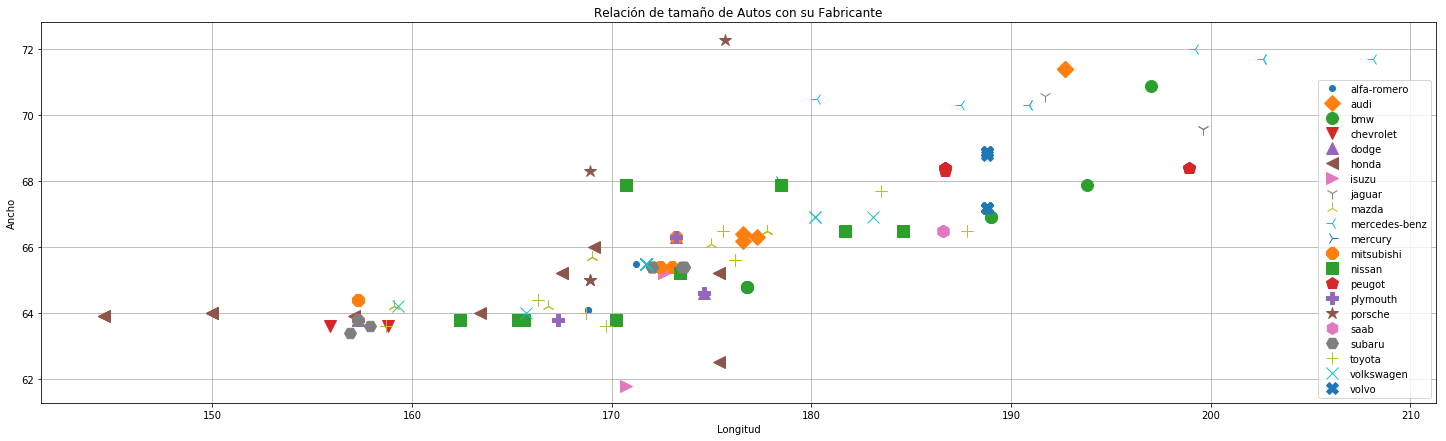

In [47]:
marcas = df.groupby('Fabricante')

fig, ax = plt.subplots(figsize=(25,7))
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
symbols = [".","D","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","_","d","|","."]
i = 0
for name, group in marcas:
    ax.plot(group.longitud, group.ancho, marker=symbols[i], linestyle='', ms=12, label=name)
    i+=1
ax.legend()
ax.grid()
ax.set_xlabel('Longitud')
ax.set_ylabel('Ancho')

ax.set_title('Relación de tamaño de Autos con su Fabricante')
plt.show()


Podemos observar que la marcas que tienden a hacer autos marcas pequeñas son Subaru y Honda. Las marcas que tienden hacer autos mas grandes son Mercedes-benz, Volvo, Peugot y BMW. Las marcas que hacen autos de tamaño mediano son Audi, Mitsubishi, Nissan, Toyota y Porsche

In [39]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Simbolo_riesgo,Base_Llanta,longitud,ancho,peso,tamano_Motor,tasa_Comrpesion,Caballos_poder,Limite_RPM,mpg_ciudad,mpg_viaje
Simbolo_riesgo,1,-0.535948,-0.361107,-0.228155,-0.545679,-0.102763,-0.175926,0.0788989,0.278689,-0.04781,0.0274735
Base_Llanta,-0.535948,1,0.878921,0.794054,0.591939,0.560565,0.254032,0.342455,-0.361341,-0.463002,-0.538703
longitud,-0.361107,0.878921,1,0.833048,0.492985,0.675484,0.158068,0.549677,-0.285786,-0.659882,-0.697592
ancho,-0.228155,0.794054,0.833048,1,0.277726,0.730168,0.185272,0.637237,-0.22048,-0.629138,-0.666979
peso,-0.545679,0.591939,0.492985,0.277726,1,0.0573276,0.251515,-0.113199,-0.312059,-0.0476547,-0.109139
tamano_Motor,-0.102763,0.560565,0.675484,0.730168,0.0573276,1,0.0281597,0.812901,-0.242649,-0.655541,-0.679014
tasa_Comrpesion,-0.175926,0.254032,0.158068,0.185272,0.251515,0.0281597,1,-0.195533,-0.429385,0.325358,0.260541
Caballos_poder,0.0788989,0.342455,0.549677,0.637237,-0.113199,0.812901,-0.195533,1,0.128421,-0.80599,-0.768991
Limite_RPM,0.278689,-0.361341,-0.285786,-0.22048,-0.312059,-0.242649,-0.429385,0.128421,1,-0.117877,-0.0537051
mpg_ciudad,-0.04781,-0.463002,-0.659882,-0.629138,-0.0476547,-0.655541,0.325358,-0.80599,-0.117877,1,0.968834


# Markdown Here

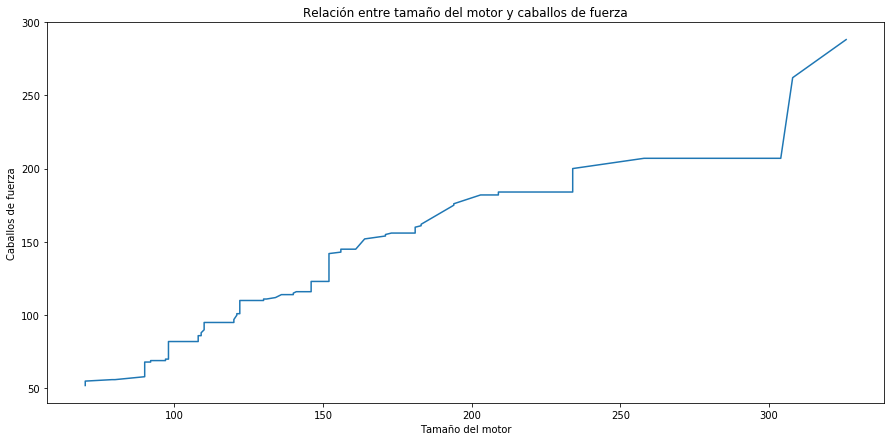

In [17]:
poder = df.sort_values(by=['Caballos_poder'])
poder = poder['Caballos_poder']
motor = df.sort_values(by=['tamano_Motor'])
motor = motor['tamano_Motor']
fig, ax = plt.subplots(figsize=(15,7))
ax.plot(motor,poder)
ax.set(xlabel='Tamaño del motor', ylabel='Caballos de fuerza', title='Relación entre tamaño del motor y caballos de fuerza')
plt.show()

Podemos ver que en gran parte de los casos, al tener un motor mas grande se tiene mas caballos de fuerza. Con la expcion del rango entre 240 y 300, donde no varia mucho los caballos de fuerza.

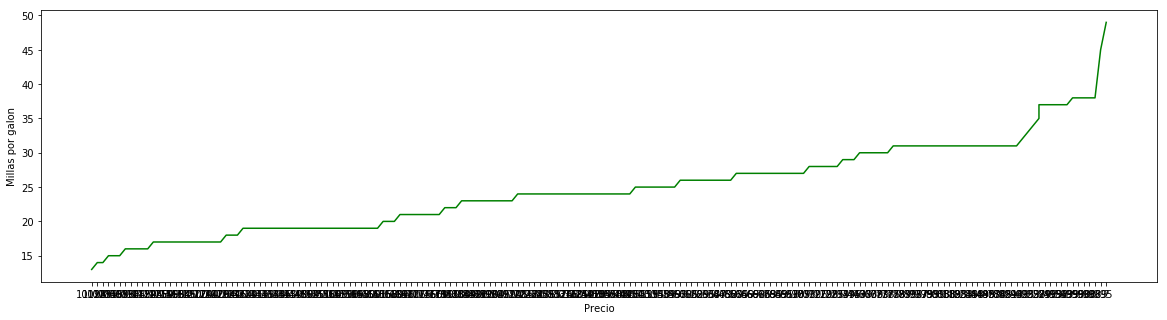

In [57]:
precios = df.sort_values(by=['precio'])
precios = precios['precio']
mpgC = df.sort_values(by=['mpg_ciudad'])
mpgC = mpgC['mpg_ciudad']
fig, ax1 = plt.subplots(figsize=(20,5))
ax1.plot(precios,mpgC,color='green')
ax1.set(xlabel='Precio',ylabel='Millas por galon')
plt.show()

ValueError: x and y must have same first dimension, but have shapes (22,) and (197,)

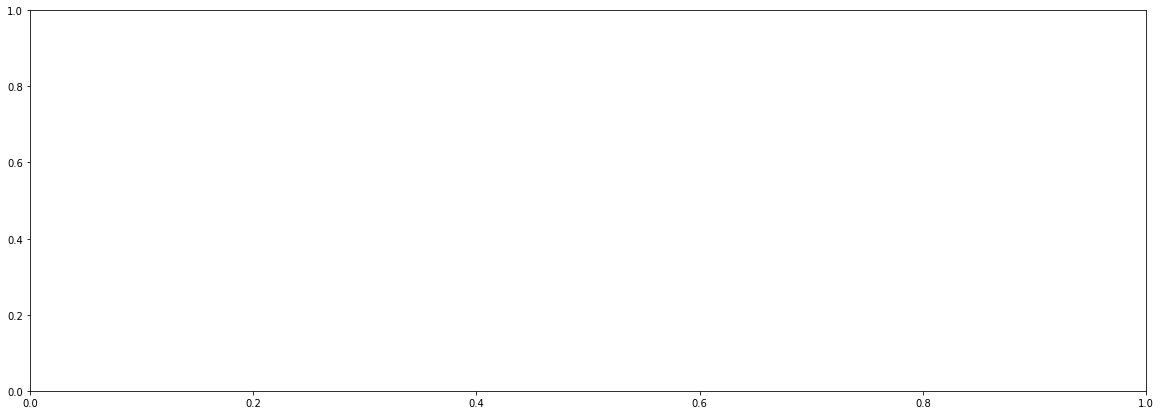

In [67]:
rpm = df.sort_values(by=['Limite_RPM'])
rpm = list(rpm['Limite_RPM'].unique())
fig, ax2 = plt.subplots(figsize=(20,7))
poder = df['Caballos_poder']
ax2.plot(rpm,pdr)
plt.show()